In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# Load the data and split it into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Get the image shape
print(X_train.shape)
print(X_test.shape)

# Take a look at the first image in the training dataset
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

In [4]:
# Print the image label
y_train[0]

5

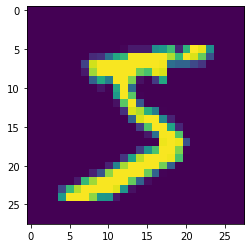

In [5]:
# Show the image as a picture
plt.imshow(X_train[0])

In [6]:
# Reshape the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)  # Depth=1 (Grey scale from white to black)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
# One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # The loss function is used for more than 2 outputs

In [10]:
# Train the model
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 3ms/step - loss: 1.3399 - accuracy: 0.8962 - val_loss: 0.0866 - val_accuracy: 0.9704
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0487 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0529 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.0636 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0572 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0578 - val_accuracy

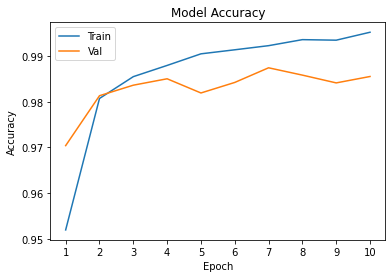

In [11]:
# Visualize the models accuracy
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dim = np.arange(10)
plt.xticks(dim, epoch)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"], loc='upper left')
plt.show()

In [12]:
# Show predictions as probabilities for the first 5 images in the test set
predictions = model.predict(X_test[:5])
print(predictions)

[[1.57550148e-13 3.42021164e-14 2.78030723e-12 3.02989134e-10
  1.53341451e-13 1.75519674e-13 2.77158264e-19 9.99999881e-01
  1.60551558e-13 6.66186892e-08]
 [1.28576355e-18 2.17330596e-14 1.00000000e+00 1.41126108e-20
  4.86960076e-22 2.66033117e-23 4.40311158e-22 1.01002563e-22
  2.61602615e-19 9.54320696e-21]
 [2.72052035e-24 1.00000000e+00 2.63147229e-17 2.01623897e-28
  5.87594986e-20 3.78045321e-18 1.92392883e-15 1.92838197e-22
  1.78568483e-18 3.88581357e-26]
 [1.00000000e+00 5.42224616e-22 1.07388771e-22 4.72086387e-20
  2.61165032e-18 2.93156136e-22 3.99015924e-11 6.17842677e-23
  8.68201690e-17 1.65780918e-15]
 [2.32853427e-20 7.74026839e-15 1.93294376e-19 1.26695511e-18
  1.00000000e+00 2.30895965e-20 4.20824645e-15 2.65909511e-14
  1.78836280e-19 8.70350612e-13]]


In [13]:
# Print out predictions as number labels for the first 5 images
print(np.argmax(predictions, axis=1))  # vertical axis

# Print the actual labels
print(y_test[:5])

# THEY SHOULD MATCH

[7 2 1 0 4]
[7 2 1 0 4]


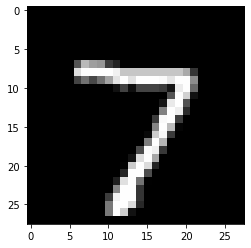

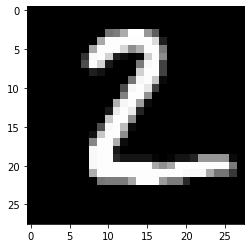

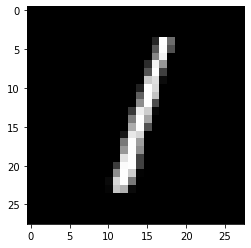

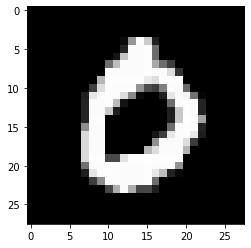

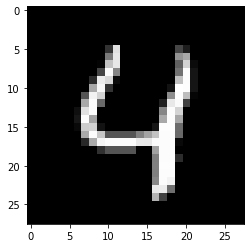

In [14]:
# Show the first 5 images as picture
for i in range(5):
    image = X_test[i]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()